# The Math of Intelligence - Week 1 - Coding challenge

## Gradient Descent

This week's coding challenge is to implement gradient descent to find the line of best fit that predicts the relationship between 2 variables from a kaggle dataset.

## Dependencies

In [2]:
import numpy as np
import pandas as pd #To read the dataset
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline

## Dataset

That's the least relevant thing but <a href="https://www.kaggle.com/reagentx/HLTVData">"CS:GO Dataset"</a> has been chosen.

From file 'ADRvsRating.csv' has been chosen the variables:
 - **ADR** : Average damage per round
 - **Rating** : HLTV Rating 2.0


Read the file, save the data as matrix, save some util variables and and give it a lookup

In [3]:
dataset = pd.read_csv('ADRvsRating.csv')
data = dataset.as_matrix()

numInstances = data.shape[0]

dataset.head()

,ADR,Rating
0,85.0,117
1,83.5,110
2,78.2,102
3,68.1,97
4,66.3,86


Let's look at the data plotted

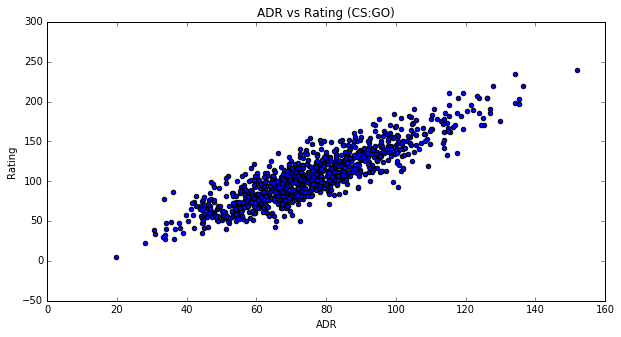

In [4]:
plt.figure(figsize=(10,5))
plt.title('ADR vs Rating (CS:GO)')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

We can see that there is a linear relationship between the two variables, let's find the best fitting line with **GRADIENT DESCENT**

Don't forget that at the end we will be able to **predict** the *Rating* of a player given the *ADR*

## Gradient Descent

Let's try to draw a line that fits through all the data points, but obviously the data is too spaced to draw a line that fits every points, so **we are going to find the BEST fitting line**

Mathematically, the line will be:

<img src="https://media.quizizz.com/resource/gs/quizizz-media/quizzes/L2FwcGhvc3RpbmdfcHJvZC9ibG9icy9BRW5CMlVvNGwxd1M2T3lQQ29DVEhHMHc4bXdySUptbXJiR1ZnSHZuWUwxc0haS2RtbjN1UWNWQWlERXBWVmVLTlBscDl6R2ozR2ZNcmVGNG9tblFpQzQzeFdvbFVNOEktUS5IenItdlY1aFU4UVdaX3E3?w=720">

In other words **we are going to find the optimal 'm' and 'b' values that defines the BEST fitting line**

Then, the prediction will be as easy as given any new 'x' value plug it into our equation and compute the 'y' (the prediction!)

### Error

Our error metric can be understood as a **measure of closeness**
 - If the line doesn't fit at all => Error will be BIG
 - If the line fits well => Error will be SMALL
 
Of course, we want to **reduce** the **error**, because doing that we are closer to the **BEST fitting line**

#### SSE - Sum of Squared Error

There are severals ways of measure the error, we will be using SSE that corresponds to that formula:

<img src="http://i64.tinypic.com/28tzx9g.png">

What we need to compute the SSE:
1. The current 'm' and 'b' to know which is our current fitting line
2. The real data, that corresponds to 'target' on the equation of the image

What we will return:
1. The error

*Note: Error will be used to **measure** the **quality** of the fitting line but **IT IS NOT INVOLVED** in the **optimization process** done by Gradient Descent.*

In [5]:
def SSE(m,b,data):
    
    totalError = 0.0
    
    for i in range(numInstances):
        
        adr = data[i,0] #Row 'i' column 'ADR'
        rating = data[i,1] #Row 'i' column 'Rating'
        
        #The real rating
        currentTarget = rating
        
        #Predicted rating with our current fitting line
        #y = mx + b
        currentOutput = m*adr + b
        
        #Compute squared error
        currentSquaredError = (currentTarget - currentOutput)**2

        
        #Add it to the total error
        totalError += currentSquaredError

    sse = totalError/numInstances
    
    return totalError

**Example of use:**

Measure the error for the fitting line:

*y = 2x + 3*

In [6]:
m = 2
b = 3

sse = SSE(m,b,data)

print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

For the fitting line: y = 2x + 3
SSE: 2644260.84


It seems a BIG error... don't expect a pretty plot

**Plot**



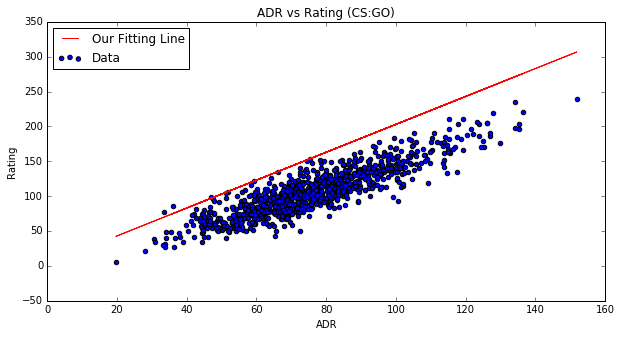

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()



Ok, ok, we are **NOT GOOD** at guessing fitting lines, that's why we are going to delegate that task to gradient descent :)

## Minimizing our error - Gradient Descent

<img src="http://www.big-data.tips/wp-content/uploads/2016/06/gradient-types.jpg" style="width:500px; float:left">



The strategy: 
1. Create a initial line
2. Update the line parameters in a way that makes the error SMALLER

The 2nd point implies that we need **a direction**, a **way to descend the error valley**

The way to go: Compute the **partial derivatives** respect to 'm' and 'b'. Get the direction that **decreases** the gradient (towards zero error) and **update 'm' and 'b' accordingly**

What we need to compute the Gradient Descent:
1. The current 'm' and 'b' to know which is our current fitting line
2. The real data, that corresponds to 'target' on the equation of the image

What will do:
1. Partial derivatives respect to 'm' and 'b'

What we will return:
1. The new 'better' updated 'm' and 'b'

In [8]:
def gradient_descent_step(m,b,data):
    
    N = numInstances
    m_grad = 0
    b_grad = 0
    
    for i in range(N):

        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]

        #Partial derivative respect 'm'
        dm = -((2/N) * x * (y - (m*x + b)))
        
        #Partial derivative respect 'b'
        db = - ((2/N) * (y - (m*x + b)))
    
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - 0.0001*m_grad
    b_updated = b - 0.0001*b_grad
    '''
    Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the 'learning rate', but it's a concept
    out of the scope of this challenge. For now, just leave that there and think about it like a 'smoother' of the learn, 
    to prevent overshooting, that is, an extremly fast and uncontrolled learning.
    '''
    
    return m_updated,b_updated

**Example of use:**

Doing just 2 steps of GD from line:

*y = 2x + 3*

In [11]:
m = 2
b = 3

sse = SSE(m,b,data)

print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

for i in range(10):
    m,b = gradient_descent_step(m,b,data)
    sse = SSE(m,b,data)
    print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

Starting line: y = 2.00x + 3.00 - Error: 2644260.84
At step 1 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 2 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 3 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 4 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 5 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 6 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 7 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 8 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 9 - Line: y = 2.00x + 3.00 - Error: 2644260.84
At step 10 - Line: y = 2.00x + 3.00 - Error: 2644260.84

Best  line: y = 2.00x + 3.00 - Error: 2644260.84


Let's do a little function to make that repetitive process easier

In [12]:
def gradient_descent_n_steps(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    print('Starting line: y = %.6fx + %.6f - Error: %.6f\n' %(m_starting,b_starting,SSE(m_starting,b_starting,data)))
    m = m_starting
    b = b_starting
    display_freq = steps//10
    for i in range(steps):
        m,b = gradient_descent_step(m,b,data)
        if(i % display_freq == 0):
            sse = SSE(m,b,data)
            print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' %(i+1,m,b,sse))
    
    
    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
    return m,b

## Train

Now, we only have to do *many* Gradient Descent steps and choose the last 'm' and 'b', because they will be:

**The 'm' and 'b' that defines the BEST FITTING line**<br><br>

<center>*Fig: Flow of GD*</center>

<img src="http://i63.tinypic.com/wild8x.jpg" style="width:600px;">

### Hyperparams

Now it's YOUR turn, define the hyperparams of the process:

- Starting 'm'
- Starting 'b'
- Num steps

Feel free to experiment with different values

In [13]:
M_STARTING = 0
B_STARTING = 0
NUM_STEPS = 1000

In [14]:
m_best,b_best = gradient_descent_n_steps(M_STARTING,B_STARTING,data,NUM_STEPS)

Starting line: y = 0.000000x + 0.000000 - Error: 12515672.000000

At step 1 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 101 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 201 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 301 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 401 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 501 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 601 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 701 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 801 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000
At step 901 - Line: y = 0.000000x + 0.000000 - Error: 12515672.000000

Best  line: y = 0.000000x + 0.000000 - Error: 12515672.000000


### How does out BEST fitting line looks like? 

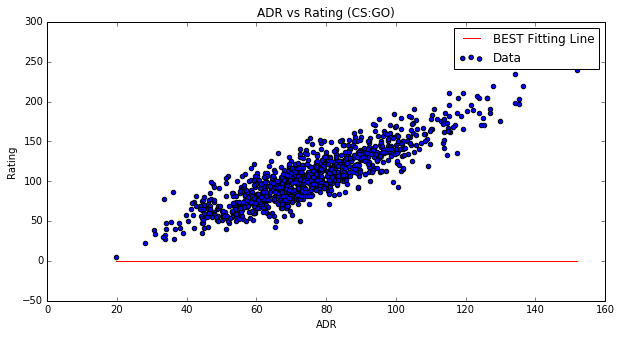

In [15]:
m=m_best
b=b_best
x = data[:,0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=x,y=data[:,1],label='Data')
plt.plot(x, m*x + b,color='red',label='BEST Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()

A lot better than before :)

And that's it!

But hey! **Don't go** yet, we can still do some faaancy and **DOPE visualizations**

*Note: All the code beyond here is out of the challenge, so you can just skip it and see the visualizations*

## Visualizing GD

Each point in this two-dimensional space represents a line. The height of the function at each point is the error value for that line.

When we do steps with our Gradient Descent we are moving over that surface and going downhill.

Let's visualize it

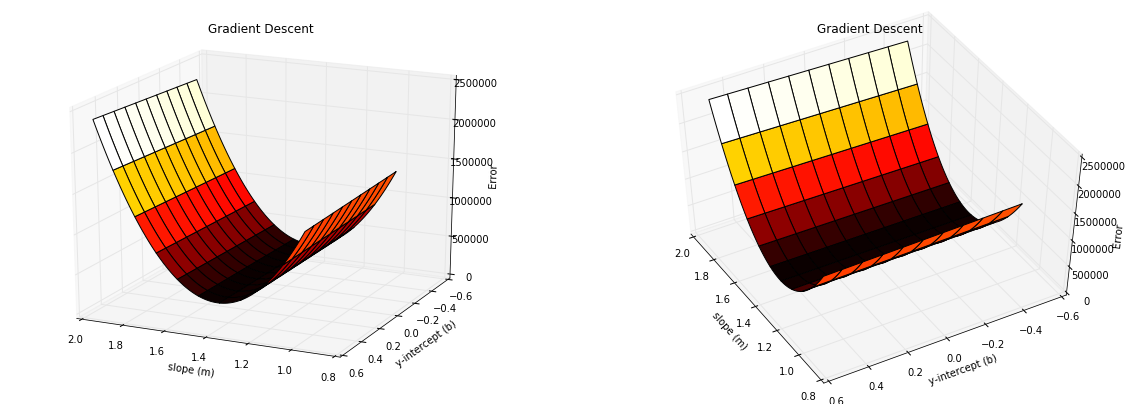

In [16]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def error(x, y):
    return SSE(x,y,data)

m = np.arange(1,2,0.01)
b = np.arange(-0.5,0.5,0.01)


fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=20.0, azim=115)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('slope (m)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')

#PLOT2
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=50.0, azim=150)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, Z,cmap='hot')

ax2.set_title('Gradient Descent')
ax2.set_xlabel('slope (m)')
ax2.set_ylabel('y-intercept (b)')
ax2.set_zlabel('Error')


plt.show()

## Visualizing Gradient Search & Intermediate Lines

Below are two **interactive plots** that representes the **gradient search** and the **fitting lines** LIVE during 10 steps

We start out at point:
* m = 1
* b = 1

Each iteration 'm' and 'b' are updated to values that yield slightly lower error than the previous iteration. 

The **left plot** displays the current location of the **gradient descent search** (up triangle) and the path taken to get there (black line). 

The **right plot** displays the **corresponding line** for the current search location. 

Note that both plots are totally synced (Same iteration at the same time on both).

In [19]:
%matplotlib notebook

def make_plots(fig,axes,m_list,b_list,m,b,data,step):
    
    #PLOT1
    ax = axes[1]
    ax.set_title('ADR vs Rating (CS:GO)')
    ax.set_xlim(0,160)
    ax.set_ylim(0,250)
    ax.set_xlabel('ADR')
    ax.set_ylabel('Rating')
    
    ax.scatter(x=data[:,0],y=data[:,1],label='Data')
    ax.plot(data[:,0], m*data[:,0] + b,color='red',label='First Fitting Line (Step %d)' % step)
    
    ax.legend(loc='best')
    
    #PLOT2
    ax2 = axes[0]
    ax2.cla()
    
    ax2.set_title('Gradient Search')
    ax2.set_xlim(0.9,1.5)
    ax2.set_ylim(0.999,1.006)
    ax2.set_xlabel('slope (m)')
    ax2.set_ylabel('y intercept (b)')
    
    ax2.text(-1.15, 0.97, 'Iteration: '+str(step),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='dimgrey', fontsize=10)
    ax2.text(-1.15, 0.93, 'm = '+str(round(m,3))+', b = '+str(round(b,3)),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='dimgrey', fontsize=10)
    
    ax2.plot(m_list,b_list,color='black',linewidth=0.5)
    ax2.scatter(m,b,marker='^')    
    
    fig.canvas.draw()
    

def gradient_descent_n_steps_with_plot(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    
    fig,axes = plt.subplots(1,2,figsize=(10,7))
    
    m_list = [m_starting]
    b_list = [b_starting]
    m = m_starting
    b = b_starting
    plt.cla()
    for i in range(steps):
        step = i
        make_plots(fig,axes,m_list,b_list,m,b,data,step)
        
        m,b = gradient_descent_step(m,b,data)
        m_list.append(m)
        b_list.append(b)
        
        time.sleep(10/steps)
        plt.cla()
        #############
            
    make_plots(fig,axes,m_list,b_list,m,b,data,step)
#end def

<IPython.core.display.Javascript object>


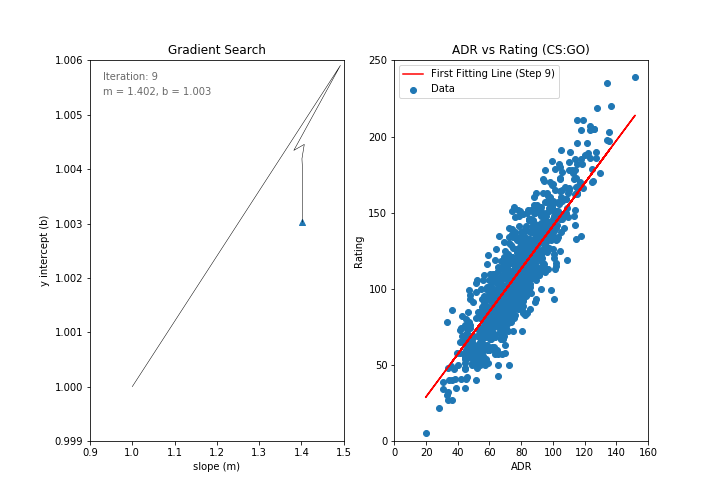

In [20]:
#RUN IT!
m = 1
b = 1
steps = 10
gradient_descent_n_steps_with_plot(m,b,data,steps)

## Visualizing Error

We can also observe how the error changes as we move toward the minimum. A good way to ensure that gradient descent is working correctly is to make sure that the error decreases for each iteration. 

Below is another **live plot** of **error values** for the first 10 iterations of the **gradient search.**

<IPython.core.display.Javascript object>


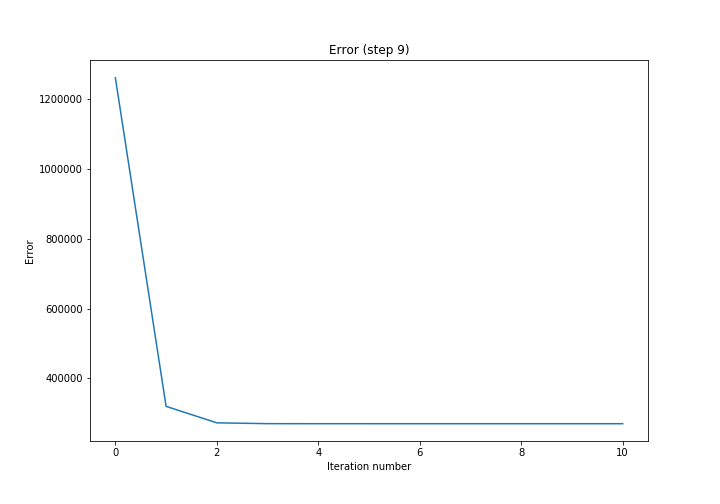

In [21]:
def error_plot(fig,ax,error_list,error,data,step):
    #PLOT2

    ax.cla()
    
    ax.set_title('Error (step %d)' % step)
    ax.set_xlabel('Iteration number')
    ax.set_ylabel('Error')
    
    ax.plot(np.arange(0,len(error_list)),error_list)    
    fig.canvas.draw()
    
def gradient_descent_n_steps_with_error_plot(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    
    m = m_starting
    b = b_starting
    error_list = list()
    
    
    error = SSE(m,b,data)
    error_list.append(error)
    
    plt.cla()
    for i in range(steps):
        step = i
        error_plot(fig,ax,error_list,error,data,step)
        
        m,b = gradient_descent_step(m,b,data)
        error = SSE(m,b,data)
        error_list.append(error)
        
        time.sleep(10/steps)
        plt.cla()
        #############
            
    error_plot(fig,ax,error_list,error,data,step)
#end def

#RUN IT!

m = 1
b = 1
steps = 10
gradient_descent_n_steps_with_error_plot(m,b,data,steps)

# EON

(End of Notebook)

;)

Alber - Originally uploaded to <a href="https://github.com/alberduris/The_Math_of_Intelligence/">Github</a>

## References

<a href="https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/">Siraj Raval - Youtube - Intro - The Math of Intelligence</a>

<a href="https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/">An Introduction to Gradient Descent and Linear Regression - MATT NEDRICH</a>